In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_csv("house_price_tehran_iran.csv")
df.head()

Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33

In [45]:
df.shape

(3479, 8)

In [46]:
len(df.Address.unique())

193

In [47]:
df2 = df.drop(['Address','Price'], axis='columns')
df2.head()

Area  Room  Parking  Warehouse  Elevator  Price(USD)
0   63     1     True       True      True    61666.67
1   60     1     True       True      True    61666.67
2   79     2     True       True      True    18333.33
3   95     2     True       True      True    30083.33
4  123     2     True       True      True   233333.33

In [48]:
df2.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Price(USD)    0
dtype: int64

<AxesSubplot:xlabel='Room', ylabel='Price(USD)'>

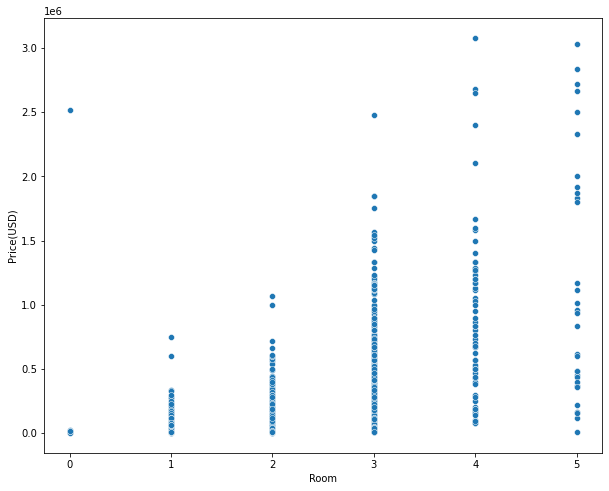

In [49]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Room', y='Price(USD)', data=df2)

In [50]:
df2.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Price(USD)    float64
dtype: object

In [51]:
df2.Area.values

array(['63', '60', '79', ..., '75', '105', '82'], dtype=object)

In [52]:
pd.to_numeric(df2.Area)

ValueError: Unable to parse string " 3,310,000,000 " at position 570

In [53]:
df2.shape

(3479, 6)

In [54]:
df2[pd.to_numeric(df2.Area, errors='coerce').isnull()]

Area  Room  Parking  Warehouse  Elevator  Price(USD)
570     3,310,000,000      2     True       True      True   110333.33
709    16,160,000,000      3     True       True      True   538666.67
807             1,000      2     True       True     False   233333.33
1604    8,400,000,000      2     True       True      True   290000.00
2171            3,600      2    False      False     False   324000.00
2802    2,550,000,000      2     True       True      True    85000.00

In [55]:
df2[pd.to_numeric(df2.Area, errors='coerce').isnull()].index

Int64Index([570, 709, 807, 1604, 2171, 2802], dtype='int64')

In [56]:
df3 = df2.drop(df2[pd.to_numeric(df2.Area, errors='coerce').isnull()].index, axis=0)
df3.shape

(3473, 6)

In [57]:
df3.Area = pd.to_numeric(df3.Area)
df3.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Price(USD)    float64
dtype: object

In [58]:
df3.describe()

Area         Room    Price(USD)
count  3473.000000  3473.000000  3.473000e+03
mean    106.774547     2.079758  1.784874e+05
std      69.365567     0.758764  2.701353e+05
min      30.000000     0.000000  1.200000e+02
25%      69.000000     2.000000  4.716667e+04
50%      90.000000     2.000000  9.600000e+04
75%     120.000000     2.000000  2.000000e+05
max     929.000000     5.000000  3.080000e+06

In [59]:
df3.sample(10)

Area  Room  Parking  Warehouse  Elevator  Price(USD)
3231    40     1    False       True     False    26333.33
3398   186     3     True       True      True   310000.00
1253   100     2     True       True      True   206666.67
2548    75     2    False      False      True    11500.00
1386   105     2     True       True      True   166666.67
1630    88     3    False      False      True    17333.33
1212   105     3     True       True      True    42000.00
1174    88     2     True       True      True   113333.33
527    111     2     True       True      True   226666.67
3033    55     1     True       True      True    75000.00

In [60]:
for column in df3:
    if df3[column].dtypes=='bool':
        print(f'{column} : {df3[column].unique()}')

Parking : [ True False]
Warehouse : [ True False]
Elevator : [ True False]


In [61]:
df3.replace(True, int(1), inplace=True)
df3.replace(False, int(0), inplace=True)
df3.head()

Area  Room  Parking  Warehouse  Elevator  Price(USD)
0    63     1      1.0        1.0       1.0    61666.67
1    60     1      1.0        1.0       1.0    61666.67
2    79     2      1.0        1.0       1.0    18333.33
3    95     2      1.0        1.0       1.0    30083.33
4   123     2      1.0        1.0       1.0   233333.33

In [69]:
df3[df3['Parking']==1]

Area  Room  Parking  Warehouse  Elevator  Price(USD)
0       63     1      1.0        1.0       1.0    61666.67
1       60     1      1.0        1.0       1.0    61666.67
2       79     2      1.0        1.0       1.0    18333.33
3       95     2      1.0        1.0       1.0    30083.33
4      123     2      1.0        1.0       1.0   233333.33
...    ...   ...      ...        ...       ...         ...
3472   113     3      1.0        1.0       1.0   105666.67
3473    63     1      1.0        1.0       0.0    63000.00
3474    86     2      1.0        1.0       1.0   116666.67
3475    83     2      1.0        1.0       1.0   226666.67
3477   105     2      1.0        1.0       1.0   186666.67

[2945 rows x 6 columns]